In [12]:
from colorsys import yiq_to_rgb

from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy
from matplotlib import pyplot as plt
from matplotlib import cm
from mpmath import nzeros
%matplotlib inline

In [13]:
width = 2

In [40]:
nx = 81
ny = 81
nt = 100
c = 1
dx = width / (nx - 1)
dy = width / (ny - 1)
sigma = .2
dt = sigma * dx

In [41]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)


In [42]:
u = numpy.ones((ny, nx))
print(u)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [43]:
un = numpy.ones((ny, nx))

In [45]:
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

In [46]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X,Y = numpy.meshgrid(x, y)

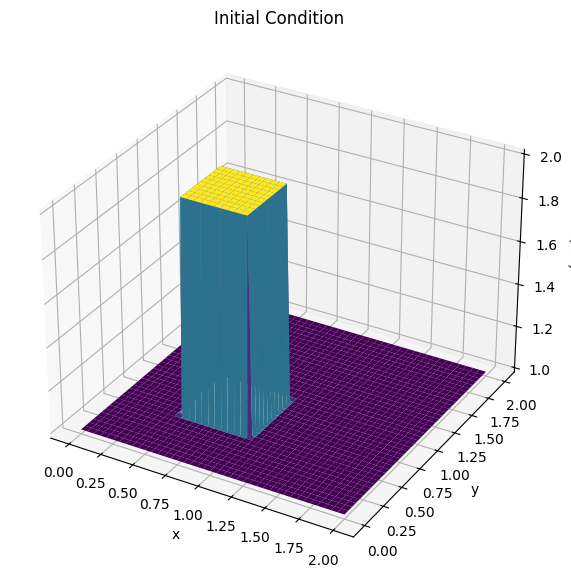

In [47]:

ax.plot_surface(X, Y, u.T, cmap=cm.viridis)
ax.set_xlabel('x')  # Add axis labels for clarity
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  # Label the z-axis
ax.set_title('Initial Condition')
plt.savefig('step-5-1_IC.png')
plt.show()

## Hat function as the initial condition

In [48]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1
            ### this is the boundary condition  - 4 static walls kinda thing 

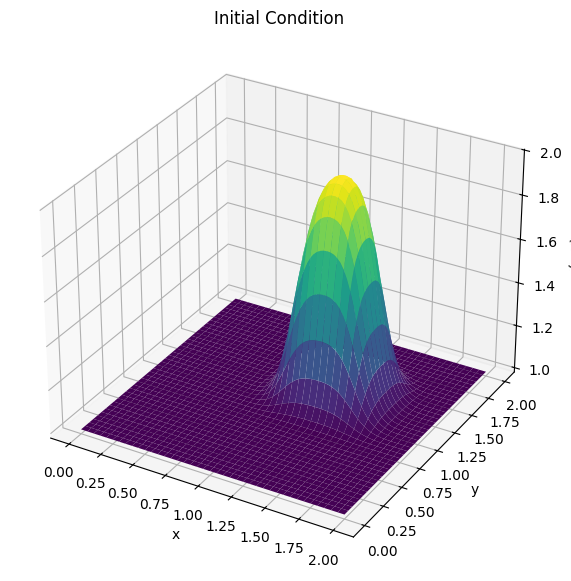

In [49]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X,Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u.T, cmap=cm.viridis)
ax.set_xlabel('x')  # Add axis labels for clarity
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  # Label the z-axis
ax.set_title('After n time steps Condition')
plt.savefig('step-5-2.png')
plt.show()

In [50]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

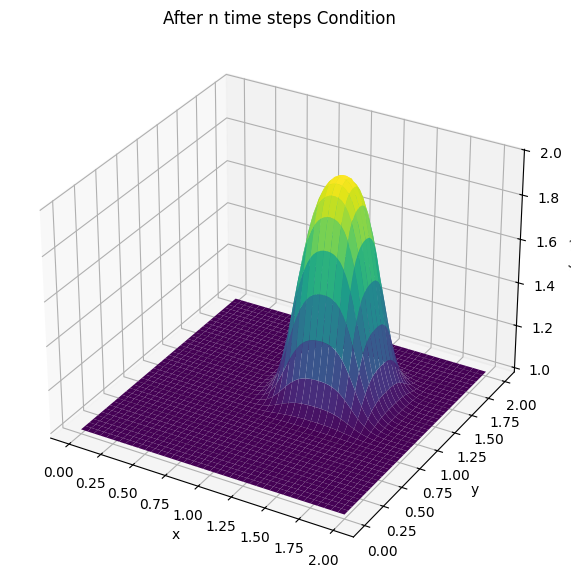

In [51]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X,Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u.T, cmap=cm.viridis)
ax.set_xlabel('x')  # Add axis labels for clarity
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')  # Label the z-axis
ax.set_title('After n time steps Condition')
plt.savefig('step-5-3.png')
plt.show()

In [ ]:
## trying out the equations in 3d

In [52]:
nx = 81
ny = 81
nz = 81
nt = 100
c = 1
dx = width / (nx - 1)
dy = width / (ny - 1)
dz = width / (nz - 1)
sigma = .2
dt = sigma * dx

In [53]:
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
z = numpy.linspace(0, 2, nz)

In [56]:
u = numpy.ones((ny, nx, nz))
un = numpy.ones((ny, nx,nz))

In [57]:
u[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1),int(.5 / dz):int(1 / dz + 1)] = 2 

In [60]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(projection='3d')
X,Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u.T, cmap=cm.viridis)
ax.set_xlabel('x')  # Add axis labels for clarity
ax.set_ylabel('y')
ax.set_ylabel('z')
ax.set_title('After n time steps Condition')
plt.savefig('step-5-2.png')
plt.show()

ValueError: Argument Z must be 2-dimensional.